# Ejercicio 1

![Ej1](ej1.png)

**A) Calcula y visualiza su histograma. Aplica una transformación de intensidad lineal que la
convierta en una imagen con poco contraste muy clara, sin que haya saturación. Diseña
la transformación de manera que se pueda asegurar, a priori que el resultado se
encuentra en [0,255] y manteniendo, en la medida de lo posible, “la forma” del
histograma. Visualiza ahora su histograma para comprobar que el resultado es
coherente.**

**Nota: consideraremos niveles de gris “muy claros” los que estén por encima de 175. La solución
que se pide debe aclarar, pero no “desnaturalizar” la imagen.
Sugerencia: Asegúrate que las operaciones que realizas no cambian el tipo de dato de las
imágenes (que es uint8 por defecto). De ser así, busca la forma de devolverlos a ese tipo de
dato. También hay que tener precaución con las operaciones que se realizan con arrays de datos
uint8, puesto que el resultado puede estar dándose módulo 256.**

Lo primero que nos piden es calcular y mostrar el histograma, por lo que vamos a cargar la imagen

In [1]:
import numpy as np 
import cv2

# Cargamos la imagen tal cual está guardada
img = cv2.imread('city.jpg',0) # La imagen debe estar en el mismo directorio
#El segundo parámetro de la función cv2.imread() es una etiqueta (flag) que puede ser: 
#  IMREAD_UNCHANGED = -1,
#  IMREAD_GRAYSCALE = 0,
#  IMREAD_COLOR = 1.
img

array([[ 53,  53,  53, ..., 127, 127, 126],
       [ 53,  53,  53, ..., 129, 128, 127],
       [ 53,  53,  53, ..., 130, 129, 128],
       ...,
       [ 31,  31,  32, ...,  71,  73,  79],
       [ 36,  36,  36, ...,  62,  70,  82],
       [ 34,  33,  31, ...,  56,  60,  59]], dtype=uint8)

Si queremos visualizar la imagen podemos hacerlo ejecutando la siguiente celda

In [2]:
# Mostramos las imágenes
cv2.imshow('image',img)
# Necesario para cerrar las ventanas:
cv2.waitKey(0)
cv2.destroyAllWindows()

Para visualizar el histograma, llamamos a calcHist de openCv

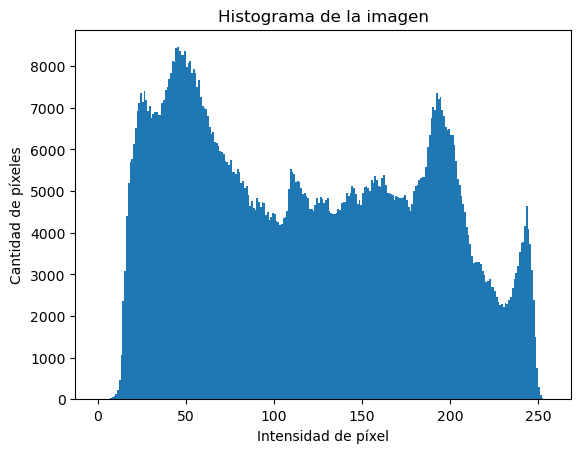

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Calculamos el histograma
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# Añadimos  etiquetas a los ejes y al título
plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.title('Histograma de la imagen')
plt.hist(img.ravel(),256,[0,256]); plt.show()

Podemos ver que la imagen tiene mucho contraste ya que los niveles de gris están muy repartidos por el histograma

Vamos a aplicar ahora una transformación lineal para que los valores esten comprendidos entre 175 y 255 como pide el enunciado (transformarla para que tenga poco contraste, lo cual conlleva a tener los valores concentrados).

He usado convertScaleAbs ya que con una transformación lineal modificando unicamente los niveles de brillo se me "desnaturalizada" la imagen dando un resultado no tan satisfactorio que usando el metodo comentado

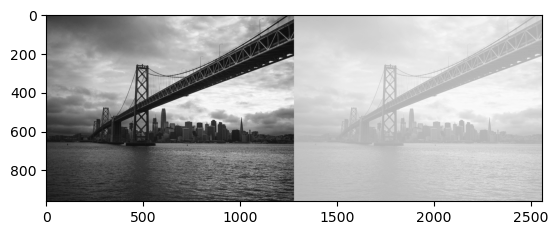

In [5]:
a = 0.3 # Contraste
b = 175 # Brillo ya que es el dado por el enuncaido

# Con convertScaleAbs lo que estamos realizando es una transformacion lineal que nos permite ajustar el brillo 
# y el contraste mediante una combinación de escala y cambio de valores de píxeles.
img_clara = cv2.convertScaleAbs(img, alpha=a, beta=b)

# De esta manera podemos ver una comparativa de las dos imágenes para ver el resultado de antes y después de aplicar la transformacion lineal
combinadas = cv2.hconcat([img,img_clara])
plt.imshow(combinadas, cmap='gray')

Vamos a visualizar su histograma y comprobar que los valores están conprendidos entre 175 y 255. Como nos pide el enunciado, también podemos ver que se mantiene la "forma" en la medida de lo posible ajustando los valores

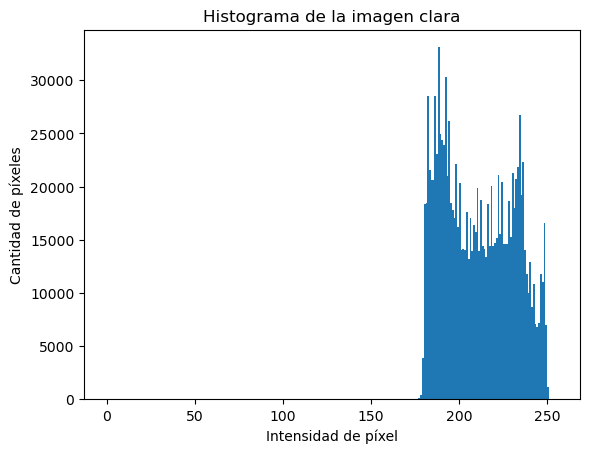

In [6]:
hist = cv2.calcHist([img_clara],[0],None,[256],[0,256])

plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.title('Histograma de la imagen clara')
plt.hist(img_clara.ravel(),256,[0,256]); plt.show()

**B) Razona qué transformación de intensidades no lineal (tipo log, exp, raíz, potencias)
podría mejorar el contraste de la imagen obtenida en el apartad  a** )

Como queremos mejorar el contraste, lo que queremos es el inverso de lo que hemos hecho antes, es decir, expandir el histograma y dividir los niveles de grises de manera más uniforme.

Como tenemos una imagen muy clara, una solución factible podría ser utilizar una transformación de potencia raiz (Corrección gamma). Aplicando un valor de n > 1 (3 ó 4 deberia dar ya un buen resultado), de esta manera podríamos oscurecer un poco la imagen y obtener un mejor contraste

**c) Implementa dicha transformación de manera que el resultado se ajuste, a priori, al intervalo [0,255], tratando de perder la menor información posible (de forma razonada).**

82


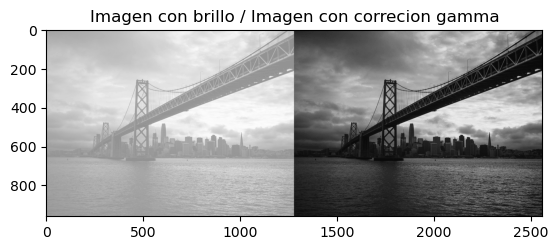

In [7]:
import numpy as np

# nivel gamma, a mayor nivel mas oscuro
n = 3

# Aplicamos corrección gamma con numpy, nos aseguramos que los valores están comprendidos entre 0-255
img_gamma = (255*(np.power(img_clara.astype(float) / 255.0, n))).astype(np.uint8)
print(img_gamma.min())

# vemos la imagen compaandola con hconcat
combinadas = cv2.hconcat([img_clara,img_gamma])
plt.title('Imagen con brillo / Imagen con correcion gamma')
plt.imshow(combinadas, cmap='gray')

Como vamos a poder ver en el histograma de abajo , lo que hemos hecho, ha sido expandir el histograma, variando el nivel de gamma podemos hacer que la imagen se vuelva más clara/oscura, he definido el valor en 3 , porque considero que el resultado es bastante bueno

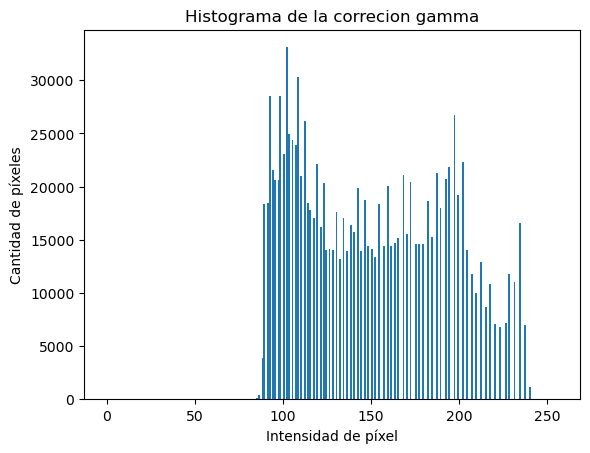

In [8]:
hist = cv2.calcHist([img_gamma],[0],None,[256],[0,256])

plt.xlabel('Intensidad de píxel')
plt.ylabel('Cantidad de píxeles')
plt.title('Histograma de la correcion gamma')
plt.hist(img_gamma.ravel(),256,[0,256]); plt.show()

# Ejercicio 2

Vamos a cargar una imagen a color, la vamos a pasar a escala de grises y mostrarla

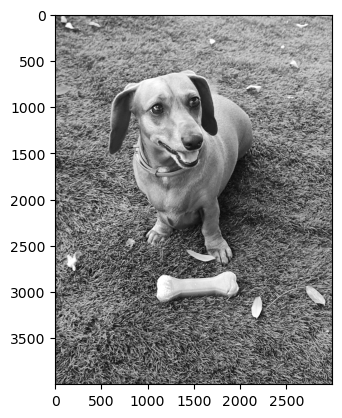

In [9]:
import numpy as np 
import cv2

# Cargamos la imagen a color
img = cv2.imread('perro1.jpg',1)
#El segundo parámetro de la función cv2.imread() es una etiqueta (flag) que puede ser: 
#  IMREAD_UNCHANGED = -1,
#  IMREAD_GRAYSCALE = 0,
#  IMREAD_COLOR = 1.

imagen = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = np.array(imagen)
plt.imshow(res)

res_gris = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY);
plt.imshow(res_gris, cmap='gray')

In [10]:
import cv2
import numpy as np
import random
def transf(image, a, b):
 aleat=np.random.randint(1,101, size = (image.shape[0], image.shape[1]))
 image2 = np.where(aleat <=100*a, 0, image)
 out = np.where(aleat > 100-100*b, 255, image2)
 return out

**a)¿Qué efecto tendrá en la imagen de entrada la función implementada? ¿Qué significado
tendrán los valores a y b? ¿Qué píxeles se ven afectados por la transformación y cómo
varía la cantidad de píxeles afectados en función de a y b?**

Lo que va a hacer la función es meter ruido, por una parte se crea una matriz aleatoria con el mismo tamaño que la imagen que se le da como parámetro.

Después el valor a y b, lo que van a hacer es cambiar x pixeles de valor por 0 (en el caso de a) al pasar un umbral y por 255 (en el caso de b).

Es decir, si ponemos un valor de **a** alto meteremos mucho ruido poniendo pixeles a negro, y si pusieramos un valor de **b** alto meteriamos mucho ruido blanco. Si combinamos ambos valores estariamos metiendo ruido sal y pimienta

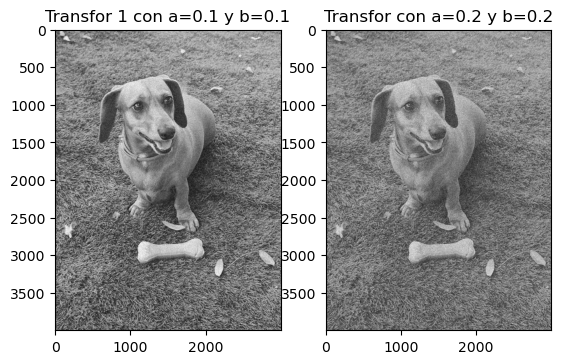

In [11]:
# Transformación con a=0.1 y b=0.1
img_trans_l1 = transf(res_gris, 0.1, 0.1)
plt.subplot(1, 2, 1) 
plt.imshow(img_trans_l1, cmap='gray')
plt.title('Transfor 1 con a=0.1 y b=0.1')

# Transformación con a=0.2 y b=0.2
img_trans_l2 = transf(res_gris, 0.2, 0.2)
plt.subplot(1, 2, 2)  
plt.imshow(img_trans_l2, cmap='gray')
plt.title('Transfor con a=0.2 y b=0.2')

plt.show()

Vamos a calcular el error cuadrático medio, que nos deberia dar mayor cuanto mas ruido tengamos en la imagen

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos una funcion para calcular el error
def mse(image1, image2):
    # Diferencia entre el original y la imagen con el ruido y esto al cuadrado
    return np.mean((image1 - image2) ** 2)

# Calculamos el MSE entre las dos imágenes transformadas
mse_value_l1 = mse(res_gris, img_trans_l1)
print("Error cuadrático medio (MSE) para l1:", mse_value_l1)
# Calculamos el MSE para el segundo caso
mse_value_l2 = mse(res_gris, img_trans_l2)
print("Error cuadrático medio (MSE) para l2:", mse_value_l2)

Error cuadrático medio (MSE) para l1: 21.655292333333332
Error cuadrático medio (MSE) para l2: 43.28712316666667


Lo que estamos viendo aqui es cuan parecidas son las imágenes con respecto a la original, es normal que cuando más ruido, mayor sea el error

**b) Aplica un filtro de media de orden 3x3 y otro de orden 5x5 para obtener una imagen
filtrada del mismo tamaño que la original. Explica el efecto. ¿Qué diferencia hay entre
este filtro y el Gaussian**?

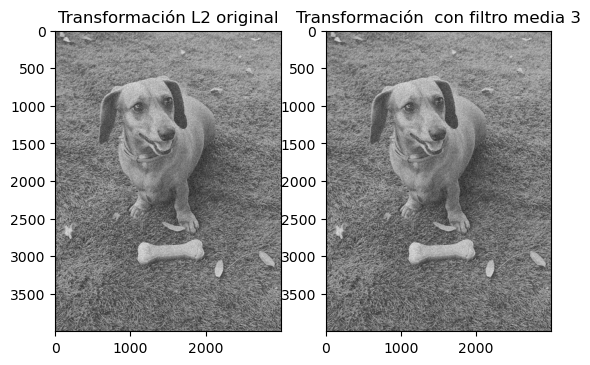

In [13]:
# Aplicar filtro de media de orden 3x3
img_filtered_3x3 = cv2.blur(img_trans_l2, (3, 3))


plt.subplot(1, 2, 1) 
plt.imshow(img_trans_l2, cmap='gray')
plt.title('Transformación L2 original')


plt.subplot(1, 2, 2)  
plt.imshow(img_filtered_3x3, cmap='gray')
plt.title('Transformación  con filtro media 3')

plt.show()

In [14]:
# Aplicar filtro de media de orden 5x5
img_filtered_5x5 = cv2.blur(img_trans_l2, (5, 5))

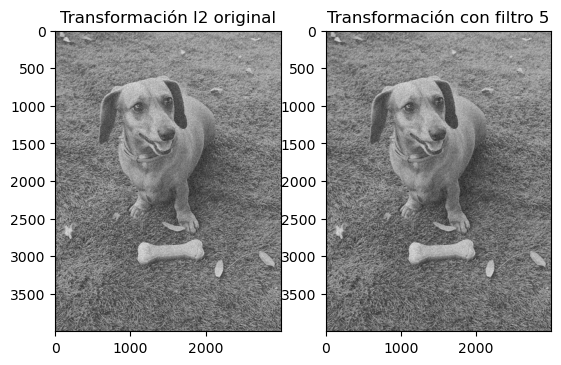

In [15]:
plt.subplot(1, 2, 1) 
plt.imshow(img_trans_l2, cmap='gray')
plt.title('Transformación l2 original')


plt.subplot(1, 2, 2)  
plt.imshow(img_filtered_5x5, cmap='gray')
plt.title('Transformación con filtro 5')

plt.show()

El efecto de este filtro de media es que reemplaza el valor de cada píxel por la media de los valores de los vecinos.
El gaussiano se diferencia de la media en que es más natural, ya que produce menos borrones, debido a que da más peso al valor del píxel que se procesa que a los de su entorno. 

**c) Razona si estos filtros (media, Gaussiano) son apropiados o no para restaurar la imagen
I. En caso de que no sean la mejor opción, usa uno que sí lo sea, razonando tu elección.
Calcula el parámetro MSE (apartado 1.5 del contenido de la asignatura) en cada caso
para comparar la imagen recuperada con la imagen origin**al.

Son buenos filtros, pero para el caso del ruido sal y pimienta que produce cambios extremos en los pixeles(0-255), es mejor aplicar un filtro de mediana.

Este filtro es bueno para este ruido ya que ordena los valores en la vecindad de cada píxel de menor a mayor y seleccionar el valor en la posición intermedia (mediana). Por lo cual eliminaria los valores extremos

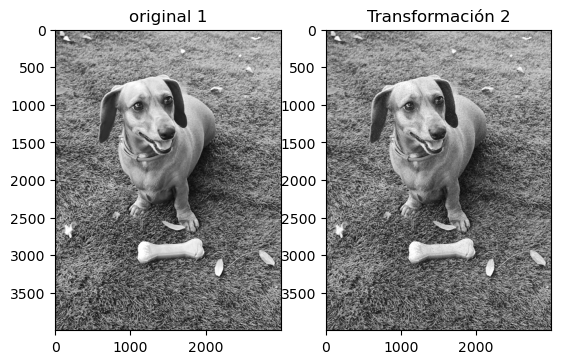

In [16]:
# Aplicar filtro de media de orden 3x3
img_filtered_3x3_mediana = cv2.medianBlur(img_trans_l2, 3)


plt.subplot(1, 2, 1) 
plt.imshow(res_gris, cmap='gray')
plt.title('original 1')


plt.subplot(1, 2, 2)  
plt.imshow(img_filtered_3x3_mediana, cmap='gray')
plt.title('Transformación 2')

plt.show()

In [17]:
# Calculamps el MSE entre las dos imágenes
mse_value_l2 = mse(res_gris, img_filtered_3x3_mediana)
print("Error cuadrático medio (MSE) para la mediana:", mse_value_l2)

Error cuadrático medio (MSE) para la mediana: 30.876879666666667


Podemos ver que la imagen que obtenemos da un buen resultado, es más parecida a la original y aunque siga habiendo error por diferencia de pixeles, el resultado es bastante bueno

# Bibliografía

https://www.geeksforgeeks.org/image-enhancement-techniques-using-opencv-python/

https://docs.opencv.org/4.9.0/d5/daf/tutorial_py_histogram_equalization.html

https://numpy.org/devdocs/user/quickstart.html

https://stackoverflow.com/questions/61695773/how-to-set-the-best-value-for-gamma-correction